In [1]:
# import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Above code imports necessary libraries for data manipulation, visualization, and machine learning. Warnings are suppressed to avoid cluttering the output with warning messages.

Data Loading: The dataset cleaned_data.csv is read into a DataFrame t3

In [4]:
t3 = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/cleaned_data.csv")
t3

Unnamed: 0             Bearer Id                Start  Start ms  \
0                0  13114483460844900352  2019-04-04 12:01:18  0.770771   
1                1  13114483482878900224  2019-04-09 13:04:04  0.235235   
2                2  13114483501243799552  2019-04-13 08:41:59  0.612613   
3                3  13042425910865399808  2019-04-14 02:11:59  0.592593   
4                4  13042425914669299712  2019-04-15 00:32:15  0.000000   
...            ...                   ...                  ...       ...   
122216      122216  13042425979329300480  2019-04-29 07:28:41  0.615616   
122217      122217   7277825670196679680  2019-04-29 07:28:42  0.451451   
122218      122218   7349883264234609664  2019-04-29 07:28:42  0.483483   
122219      122219  13114483573367300096  2019-04-29 07:28:43  0.283283   
122220      122220  13114483573367300096  2019-04-29 07:28:43  0.696697   

                        End    End ms  Dur. (ms)      IMSI  MSISDN/Number  \
0       2019-04-25 14:35:31  0.662663   0.980734  0.000229       0.338423   
1       2019-04-25 08:15:48  0.606607   0.733164  0.000308       0.427802   
2       2019-04-25 08:16:21  0.168168   0.555082  0.000229       0.340572   
3       2019-04-25 02:26:52  0.512513   0.509747  0.000155       0.859747   
4       2019-04-25 00:40:17  0.284284   0.462878  0.000036       0.308039   
...                     ...       ...        ...       ...            ...   
122216  2019-04-30 00:01:49  0.407407   0.028315  0.000222       0.357928   
122217  2019-04-30 06:02:33  0.214214   0.040000  0.000358       0.262900   
122218  2019-04-30 10:41:33  0.187187   0.049038  0.000308       0.330422   
122219  2019-04-30 10:46:12  0.810811   0.049189  0.000274       0.110523   
122220  2019-04-30 10:40:34  0.327327   0.049006  0.000340       0.098523   

            IMEI  ... Youtube DL (Bytes)  Youtube UL (Bytes)  \
0       0.355932  ...           0.681651            0.113631   
1       0.358700  ...           0.870515            0.868242   
2       0.875828  ...           0.311037            0.085690   
3       0.873634  ...           0.524086            0.896566   
4       0.356458  ...           0.702449            0.298616   
...          ...  ...                ...                 ...   
122216  0.354017  ...           0.281630            0.817879   
122217  0.355545  ...           0.696143            0.534408   
122218  0.357345  ...           0.596636            0.376532   
122219  0.357961  ...           0.974264            0.084309   
122220  0.869979  ...           0.379081            0.377310   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0                 0.352502            0.438681           0.329689   
1                 0.788437            0.782626           0.721741   
2                 0.568850            0.816909           0.053097   
3                 0.294871            0.548574           0.887915   
4                 0.525002            0.044256           0.961957   
...                    ...                 ...                ...   
122216            0.966026            0.324810           0.930040   
122217            0.768887            0.893976           0.624352   
122218            0.831935            0.967345           0.743252   
122219            0.428386            0.230136           0.656281   
122220            0.142835            0.598428           0.417966   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0                0.866255          0.203610          0.532305   
1                0.070697          0.624700          0.909194   
2                0.850601          0.952825          0.643147   
3                0.975290          0.637384          0.465891   
4                0.096093          0.076879          0.773921   
...                   ...               ...               ...   
122216           0.768458          0.381027          0.899250   
122217           0.555426          0.003854          0.814516   

Various plotting functions are defined to create histograms, count plots, bar plots, heatmaps, box plots, scatter plots, and violin plots. These functions are designed to visualize different aspects of the data.

In [6]:
# Define plotting functions
import random


def plot_hist(t3: pd.DataFrame, column: str, color: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.histplot(data=t3, x=column, color=color, kde=True)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(t3: pd.DataFrame, column: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=t3, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(t3: pd.DataFrame, x_col: str, y_col: str, title: str, xlabel: str, ylabel: str, color: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data=t3, x=x_col, y=y_col, color=color)
    plt.title(title, size=20)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_heatmap(t3: pd.DataFrame, title: str, cbar: bool = False) -> None:
    numeric_t3 = t3.select_dtypes(include=[np.number])
    if numeric_t3.empty:
        print("No numeric columns available for heatmap.")
        return
    corr_matrix = numeric_t3.corr()
    plt.figure(figsize=(12, 7))
    sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.7, cbar=cbar)
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(t3: pd.DataFrame, x_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=t3, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def random_color() -> str:
    colors = list(mcolors.CSS4_COLORS.values())
    return random.choice(colors)

def plot_box_multi(t3: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=t3, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

def plot_scatter(t3: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=t3, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xlabel(x_col, fontsize=16)
    plt.ylabel(y_col, fontsize=16)
    plt.show()

def plot_violin(t3: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.violinplot(data=t3, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

def format_float(value) -> str:
    return f'{value:,.2f}'

def fix_outlier(t3: pd.DataFrame, column: str) -> pd.Series:
    threshold = t3[column].quantile(0.95)
    t3[column] = np.where(t3[column] > threshold, t3[column].median(), t3[column])
    return t3[column]

pd.options.display.float_format = format_float

# Task 3 - Experience Analytics

In [8]:
def null_percentage(t3):
    # Calculate the total number of elements in the dataframe
    number_of_rows, number_of_columns = t3.shape
    t3_size = number_of_rows * number_of_columns
    
    # Calculate the number of null elements in the dataframe
    null_size = t3.isnull().sum().sum()
    
    # Calculate the percentage of null values
    percentage = round((null_size / t3_size) * 100, 2)
    
    # Print the result
    print(f"DataFrame contains {percentage}% null values")

# Example usage:
null_percentage(t3)
    

DataFrame contains 0.0% null values


null_percentage Function: Calculates and prints the percentage of null values in the DataFrame.

In [10]:
def new(t3):
    cols = ['MSISDN/Number','Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
            'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
]
    t3['TCP Retransmission'] = t3[cols[5]] + t3[cols[6]]
    t3['RTT'] = t3[cols[1]] + t3[cols[2]]
    t3['Throughput'] = t3[cols[3]] + t3[cols[4]]
    return t3
dt = new(t3)

In [11]:
dt['TCP Retransmission'] = dt['TCP Retransmission'].fillna(dt['TCP Retransmission'].mean())
dt['RTT'] = dt['RTT'].fillna(dt['RTT'].mean())
dt['Throughput'] = dt['Throughput'].fillna(dt['Throughput'].mean())
dt['Handset Type'] = dt['Handset Type'].fillna(dt['Handset Type'].mode()[0])

In [12]:
dt.head()

Unnamed: 0             Bearer Id                Start  Start ms  \
0           0  13114483460844900352  2019-04-04 12:01:18      0.77   
1           1  13114483482878900224  2019-04-09 13:04:04      0.24   
2           2  13114483501243799552  2019-04-13 08:41:59      0.61   
3           3  13042425910865399808  2019-04-14 02:11:59      0.59   
4           4  13042425914669299712  2019-04-15 00:32:15      0.00   

                   End  End ms  Dur. (ms)  IMSI  MSISDN/Number  IMEI  ...  \
0  2019-04-25 14:35:31    0.66       0.98  0.00           0.34  0.36  ...   
1  2019-04-25 08:15:48    0.61       0.73  0.00           0.43  0.36  ...   
2  2019-04-25 08:16:21    0.17       0.56  0.00           0.34  0.88  ...   
3  2019-04-25 02:26:52    0.51       0.51  0.00           0.86  0.87  ...   
4  2019-04-25 00:40:17    0.28       0.46  0.00           0.31  0.36  ...   

  Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0               0.44               0.33               0.87              0.20   
1               0.78               0.72               0.07              0.62   
2               0.82               0.05               0.85              0.95   
3               0.55               0.89               0.98              0.64   
4               0.04               0.96               0.10              0.08   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  TCP Retransmission  \
0              0.53              0.44              0.34                0.00   
1              0.91              0.67              0.72                0.00   
2              0.64              0.59              0.07                0.00   
3              0.47              0.74              0.86                0.00   
4              0.77              0.24              0.95                0.00   

   RTT  Throughput  
0 0.00        0.00  
1 0.00        0.00  
2 0.00        0.00  
3 0.00        0.02  
4 0.00        0.05  

[5 rows x 59 columns]

Feature Engineering: Adds new features to the DataFrame:

TCP Retransmission: Sum of TCP retransmission volumes.
RTT: Sum of RTT values.
Throughput: Sum of throughput values.

Fill Missing Values: Fills missing values in the new columns and Handset Type with mean or mode.

In [14]:
t3.shape

(122221, 59)

In [15]:
aggregate = {'Handset Type':'first','TCP Retransmission':'sum', 'Throughput':'sum', 'RTT':'sum'}
columns = ['MSISDN/Number','Bearer Id','Handset Type', 'TCP Retransmission', 'Throughput', 'RTT']
dt = dt.groupby('MSISDN/Number').agg(aggregate).reset_index()
dt.head(10)

MSISDN/Number                                      Handset Type  \
0           0.00                    Huawei P20 Lite Huawei Nova 3E   
1           0.00                            Apple iPhone 7 (A1778)   
2           0.00                           Apple iPhone 5S (A1457)   
3           0.00                           Apple iPhone Se (A1723)   
4           0.00                          Samsung Galaxy A8 (2018)   
5           0.00  Huawei Mate 10 Pro Porsche Design Huawei Mate 10   
6           0.00                 Samsung Galaxy S8 Plus (Sm-G955F)   
7           0.00                            Apple iPhone X (A1865)   
8           0.00                                         undefined   
9           0.00                       Apple iPhone 7 Plus (A1784)   

   TCP Retransmission  Throughput  RTT  
0                0.00        0.00 0.00  
1                0.00        0.00 0.00  
2                0.00        0.00 0.00  
3                0.00        0.39 0.00  
4                0.00        0.03 0.00  
5                0.00        0.13 0.00  
6                0.00        0.01 0.00  
7                0.00        0.00 0.00  
8                0.00        0.00 0.00  
9                0.00        0.06 0.00

In [16]:
customer_agg = dt.groupby('MSISDN/Number').agg({
    'TCP Retransmission': 'mean',
    'RTT': 'mean',
    'Throughput': 'mean',
    'Handset Type': lambda x: x.mode()[0]
}).reset_index()

Aggregation: Groups data by MSISDN/Number and aggregates:

aggregate: Computes sum for TCP Retransmission, Throughput, and RTT, and takes the first value for Handset Type.

customer_agg: Computes mean values for TCP Retransmission, RTT, and Throughput, and the most common Handset Type.

In [18]:
customer_agg.head()

MSISDN/Number  TCP Retransmission  RTT  Throughput  \
0           0.00                0.00 0.00        0.00   
1           0.00                0.00 0.00        0.00   
2           0.00                0.00 0.00        0.00   
3           0.00                0.00 0.00        0.39   
4           0.00                0.00 0.00        0.03   

                     Handset Type  
0  Huawei P20 Lite Huawei Nova 3E  
1          Apple iPhone 7 (A1778)  
2         Apple iPhone 5S (A1457)  
3         Apple iPhone Se (A1723)  
4        Samsung Galaxy A8 (2018)

# Task 3.2 - Compute & list 10 of the top, bottom and most frequent:

In [20]:
def get_top_bottom_frequent(series):
    top_10 = series.nlargest(10)
    bottom_10 = series.nsmallest(10)
    most_frequent = series.value_counts().head(10)
    return top_10, bottom_10, most_frequent

In [21]:
tcp_top_10, tcp_bottom_10, tcp_most_frequent = get_top_bottom_frequent(t3['TCP Retransmission'])

In [22]:
rtt_top_10, rtt_bottom_10, rtt_most_frequent = get_top_bottom_frequent(t3['RTT'])

In [23]:
throughput_top_10, throughput_bottom_10, throughput_most_frequent = get_top_bottom_frequent(t3['Throughput'])

In [24]:
print("Top 10 TCP Retransmission Values:", tcp_top_10)
print("Bottom 10 TCP Retransmission Values:", tcp_bottom_10)
print("Most Frequent TCP Retransmission Values:", tcp_most_frequent)

Top 10 TCP Retransmission Values: 30229    1.02
115085   1.00
31728    1.00
64128    1.00
110231   1.00
3552     1.00
98608    1.00
34995    0.99
49385    0.99
63174    0.99
Name: TCP Retransmission, dtype: float64
Bottom 10 TCP Retransmission Values: 91038    0.00
117446   0.00
17225    0.00
12221    0.00
8116     0.00
81323    0.00
68589    0.00
80275    0.00
84091    0.00
11942    0.00
Name: TCP Retransmission, dtype: float64
Most Frequent TCP Retransmission Values: TCP Retransmission
0.00    57759
0.00      650
0.00      247
0.00      240
0.00      136
0.00      129
0.00      128
0.00      118
0.00      105
0.00       98
Name: count, dtype: int64


get_top_bottom_frequent Function: Finds the top 10, bottom 10, and most frequent values for a given series.

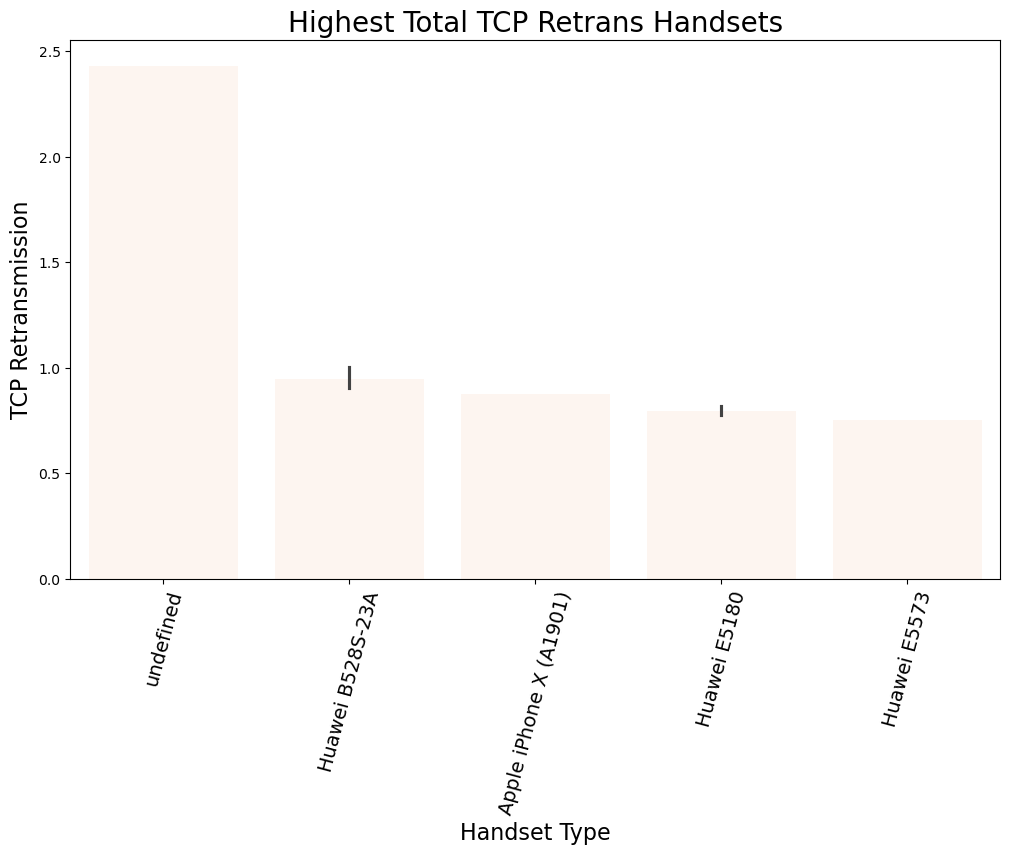

In [26]:
result = dt.sort_values(by='TCP Retransmission', ascending=False)[:100]
plot_bar(result, 'Handset Type', 'TCP Retransmission', 'Highest Total TCP Retrans Handsets', 'Handset Type', 'TCP Retransmission', random_color())

In [27]:
# Bottom 5
dt.sort_values(by='TCP Retransmission', ascending=True)[:5]

MSISDN/Number             Handset Type  TCP Retransmission  Throughput  \
19178           0.26  Apple iPhone 5S (A1457)                0.00        0.09   
5164            0.07      Huawei Ascend Mate7                0.00        0.03   
10996           0.13   Apple iPhone 7 (A1778)                0.00        0.04   
80325           0.85   Apple iPhone 8 (A1905)                0.00        0.10   
1755            0.04  Apple iPhone 5C (A1529)                0.00        0.05   

       RTT  
19178 0.00  
5164  0.00  
10996 0.00  
80325 0.00  
1755  0.00

In [28]:
# most frequent
dt['TCP Retransmission'].value_counts().head(10)

TCP Retransmission
0.00    31646
0.00     5067
0.00      742
0.00      365
0.00      187
0.00      176
0.00      152
0.00       83
0.00       83
0.00       80
Name: count, dtype: int64

In [29]:
print("Top 10 RTT Values:", rtt_top_10)
print("Bottom 10 RTT Values:", rtt_bottom_10)
print("Most Frequent RTT Values:",  rtt_most_frequent)

Top 10 RTT Values: 18737    1.00
26706    1.00
107778   0.79
70130    0.76
129      0.74
26565    0.67
79706    0.66
37227    0.60
5467     0.57
42718    0.57
Name: RTT, dtype: float64
Bottom 10 RTT Values: 37629    0.00
85900    0.00
102735   0.00
117659   0.00
59042    0.00
43633    0.00
118394   0.00
86021    0.00
8078     0.00
101788   0.00
Name: RTT, dtype: float64
Most Frequent RTT Values: RTT
0.00    1425
0.00    1375
0.00    1193
0.00     747
0.00     682
0.00     676
0.00     609
0.00     595
0.00     586
0.00     582
Name: count, dtype: int64


Print and Plot: Displays and plots the top 10, bottom 10, and most frequent values for TCP Retransmission, RTT, and Throughput.

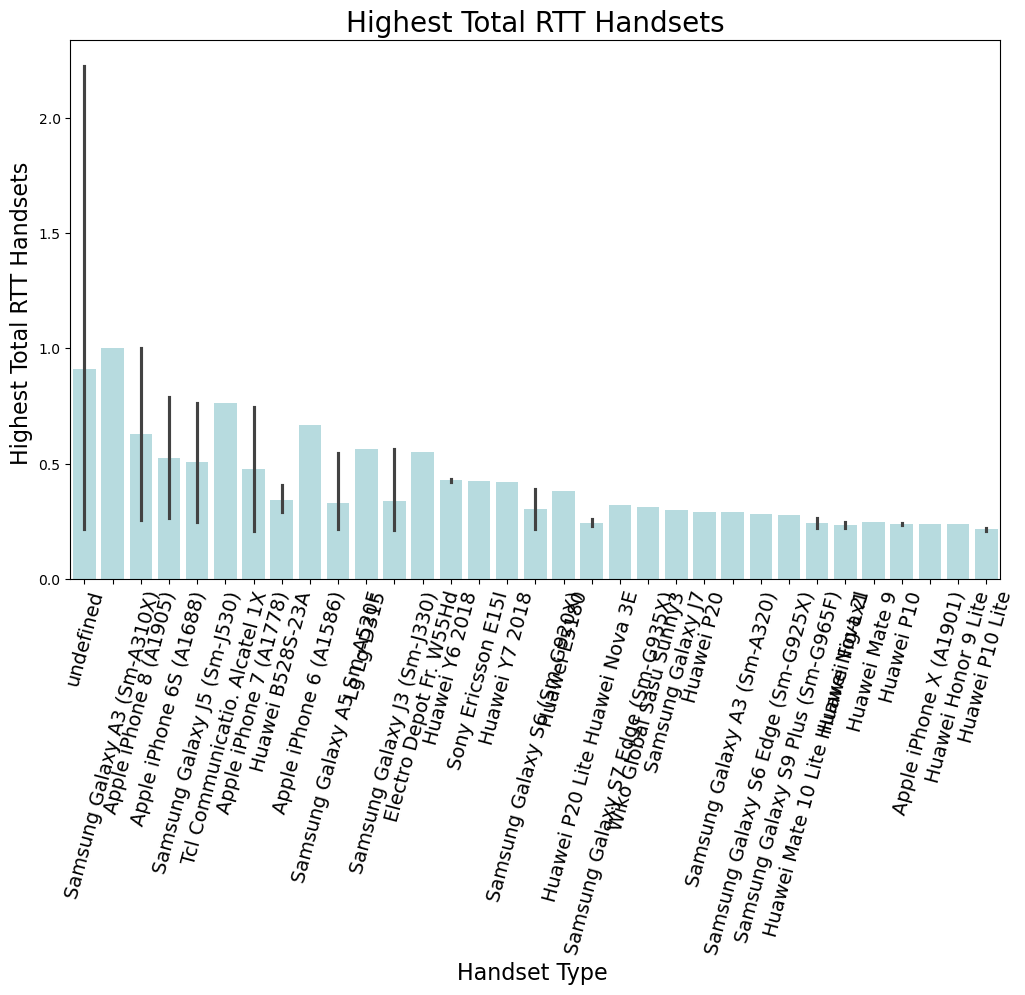

In [31]:

result = dt.sort_values(by='RTT', ascending=False)[:100]
plot_bar(result, 'Handset Type', 'RTT', 'Highest Total RTT Handsets',"Handset Type ","Highest Total RTT Handsets ", random_color())

In [32]:
# Bottom 5
dt.sort_values(by='RTT', ascending=True)[:5]

MSISDN/Number             Handset Type  TCP Retransmission  Throughput  \
37237           0.32           Huawei Pct-L29                0.00        0.00   
23746           0.28           Huawei P20 Pro                0.00        0.00   
32487           0.31   Apple iPhone X (A1901)                0.00        0.00   
69254           0.50               Huawei P20                0.00        0.00   
29897           0.31  Apple iPhone 6S (A1688)                0.00        0.00   

       RTT  
37237 0.00  
23746 0.00  
32487 0.00  
69254 0.00  
29897 0.00

In [33]:
# most frequent
dt['RTT'].value_counts().head(10)

RTT
0.00    867
0.00    763
0.00    577
0.00    416
0.00    409
0.00    380
0.00    363
0.00    357
0.00    321
0.00    316
Name: count, dtype: int64

In [34]:
print("Top 10 Throughput Values:",throughput_top_10)
print("Bottom 10 Throughput Values:", throughput_bottom_10)
print("Most Frequent Throughput Values:", throughput_most_frequent)

Top 10 Throughput Values: 75877    1.57
41911    1.38
5410     1.37
115667   1.36
37268    1.33
95867    1.31
97240    1.26
102884   1.25
95950    1.24
110569   1.22
Name: Throughput, dtype: float64
Bottom 10 Throughput Values: 2304    0.00
8638    0.00
19187   0.00
19823   0.00
23009   0.00
85514   0.00
89006   0.00
21441   0.00
13255   0.00
18654   0.00
Name: Throughput, dtype: float64
Most Frequent Throughput Values: Throughput
0.00    3360
0.00     864
0.00     630
0.00     554
0.00     508
0.00     446
0.00     400
0.00     379
0.00     363
0.00     337
Name: count, dtype: int64


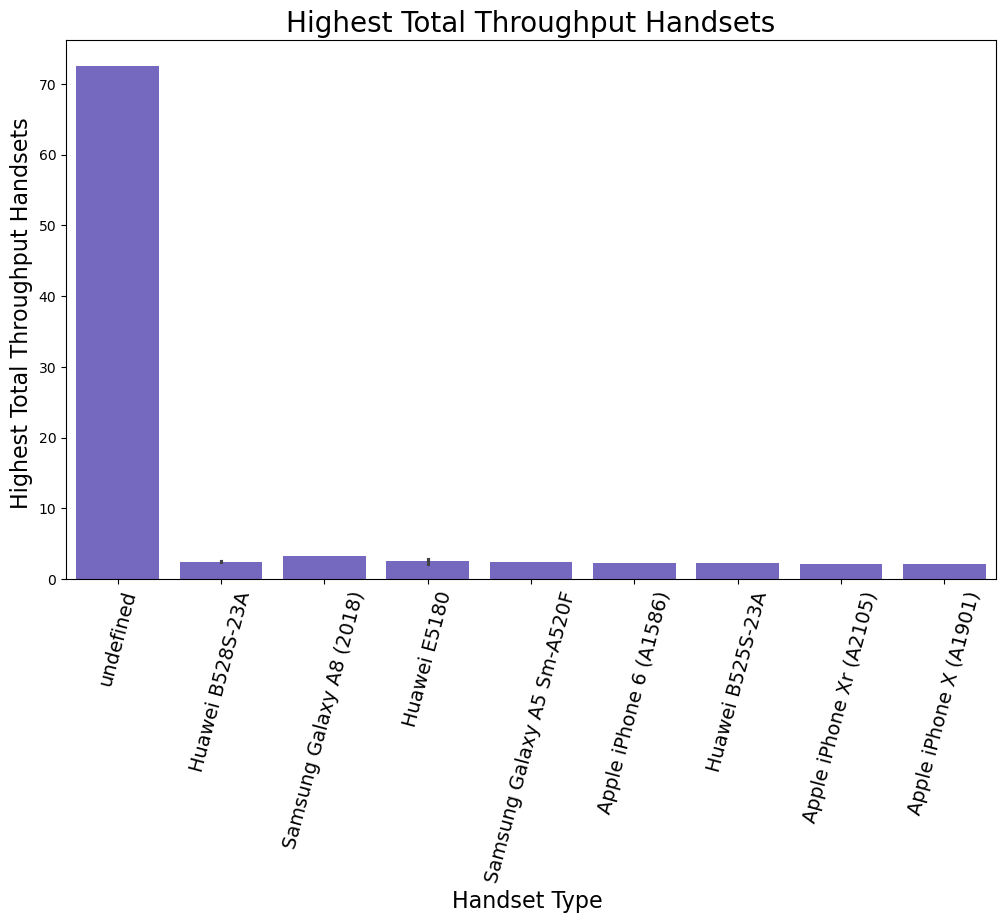

In [35]:

result = dt.sort_values(by='Throughput', ascending=False)[:100]
plot_bar(result, 'Handset Type', 'Throughput', 'Highest Total Throughput Handsets',"Handset Type ","Highest Total Throughput Handsets ", random_color())


In [36]:
# Bottom 5
dt.sort_values(by='Throughput', ascending=True)[:5]

MSISDN/Number                        Handset Type  TCP Retransmission  \
86871           0.96                           undefined                0.00   
78486           0.85                          Lg Lg-T385                0.00   
54673           0.35                           undefined                0.00   
976             0.02  Lenovo Moto G (3Rd Gen) Ca12459445                0.00   
1986            0.04                           undefined                0.00   

       Throughput  RTT  
86871        0.00 0.00  
78486        0.00 0.00  
54673        0.00 0.06  
976          0.00 0.00  
1986         0.00 0.00

In [37]:
# most frequent
dt['Throughput'].value_counts().head(10)

Throughput
0.00    1751
0.00     470
0.00     306
0.00     280
0.00     258
0.00     243
0.00     223
0.00     214
0.00     164
0.00     157
Name: count, dtype: int64

# Task 3.3: Compute & Report Metrics by Handset Type

Calculates and prints average throughput and TCP retransmission by handset type. Also finds top 5 handsets with the highest throughput and RTT.

In [40]:
# Distribution of Average Throughput per Handset Type
throughput_distribution = customer_agg.groupby('Handset Type')['Throughput'].mean().sort_values(ascending=False)
print("Throughput Distribution by Handset Type:\n", throughput_distribution)



Throughput Distribution by Handset Type:
 Handset Type
Asustek Wireless-Ac1200 Lte Router         0.80
Sierra Wireless Mc7710                     0.72
Huawei B715S-23C                           0.69
New-Bund Technol. Thor                     0.54
Xiaomi Communica. M1803E1A                 0.53
                                           ... 
Samsung Galaxy Wave Y (Gt-S5380)           0.00
Concox Informati. Gt06                     0.00
Oppo R11S                                  0.00
Concox Informati. Concox Gt06 Gt06N Tr06   0.00
Lg Lg-T385                                 0.00
Name: Throughput, Length: 1354, dtype: float64


In [41]:
# Average TCP Retransmission per Handset Type
tcp_retransmission_avg = customer_agg.groupby('Handset Type')['TCP Retransmission'].mean().sort_values(ascending=False)
print("Average TCP Retransmission by Handset Type:\n", tcp_retransmission_avg)


Average TCP Retransmission by Handset Type:
 Handset Type
Lg Lg-H635                            0.21
Huawei Bln-Al10                       0.08
Asustek Asus Zenfone Selfie Zd551Kl   0.08
Samsung Galaxy Tab S3 (Sm-T825)       0.06
Huawei E5776S-32                      0.05
                                      ... 
Oppo A37F                             0.00
Gotron (Hk) Elec. Armor X             0.00
Lenovo Moto X Play                    0.00
Samsung Galaxy Note 8 (Sm-N9500)      0.00
Casper Bilgisaya. Via M1              0.00
Name: TCP Retransmission, Length: 1354, dtype: float64


In [42]:
handset_throughput = dt.groupby('Handset Type').agg({'Throughput': 'sum'}).reset_index()
handset_throughput.sort_values(by='Throughput', ascending=False).head(5)


Handset Type  Throughput
307          Huawei B528S-23A    3,824.49
1353                undefined      417.78
58     Apple iPhone 7 (A1778)      331.67
52    Apple iPhone 6S (A1688)      327.22
48     Apple iPhone 6 (A1586)      315.59

In [43]:
handset_rtt = dt.groupby('Handset Type').agg({'RTT': 'sum'}).reset_index()
handset_rtt.sort_values(by='RTT', ascending=False).head(5)

Handset Type    RTT
307          Huawei B528S-23A 131.37
1353                undefined  21.34
48     Apple iPhone 6 (A1586)  15.74
327              Huawei E5180  14.47
52    Apple iPhone 6S (A1688)  14.03

# Task 3.4: K-Means Clustering

Scales the features and performs K-Means clustering with 3 clusters, adding the cluster labels to customer_agg.

In [46]:
features = customer_agg[['TCP Retransmission', 'RTT', 'Throughput']]

In [47]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_agg['Experience Cluster'] = kmeans.fit_predict(scaled_features)


In [49]:
non_numeric_columns = customer_agg.select_dtypes(exclude=['number']).columns
print("Non-Numeric Columns:", non_numeric_columns)


Non-Numeric Columns: Index(['Handset Type'], dtype='object')


In [50]:
# Exclude non-numeric columns before grouping
numeric_customer_agg = customer_agg.select_dtypes(include=['number'])

# Perform the groupby and mean operation
cluster_analysis = numeric_customer_agg.groupby(customer_agg['Experience Cluster']).mean()

# Display the cluster analysis
print("Cluster Analysis:\n")
cluster_analysis


Cluster Analysis:



MSISDN/Number  TCP Retransmission  RTT  Throughput  \
Experience Cluster                                                       
0                            0.39                0.00 0.00        0.11   
1                            0.33                2.43 3.56       72.58   
2                            0.45                0.69 0.02        0.67   

                    Experience Cluster  
Experience Cluster                      
0                                 0.00  
1                                 1.00  
2                                 2.00

Analyzes the average values of features within each cluster.

In [52]:
# Save eng df for further use
t3.to_csv('C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/experience_df.csv',index=False)

Saves the modified DataFrame to a CSV file.

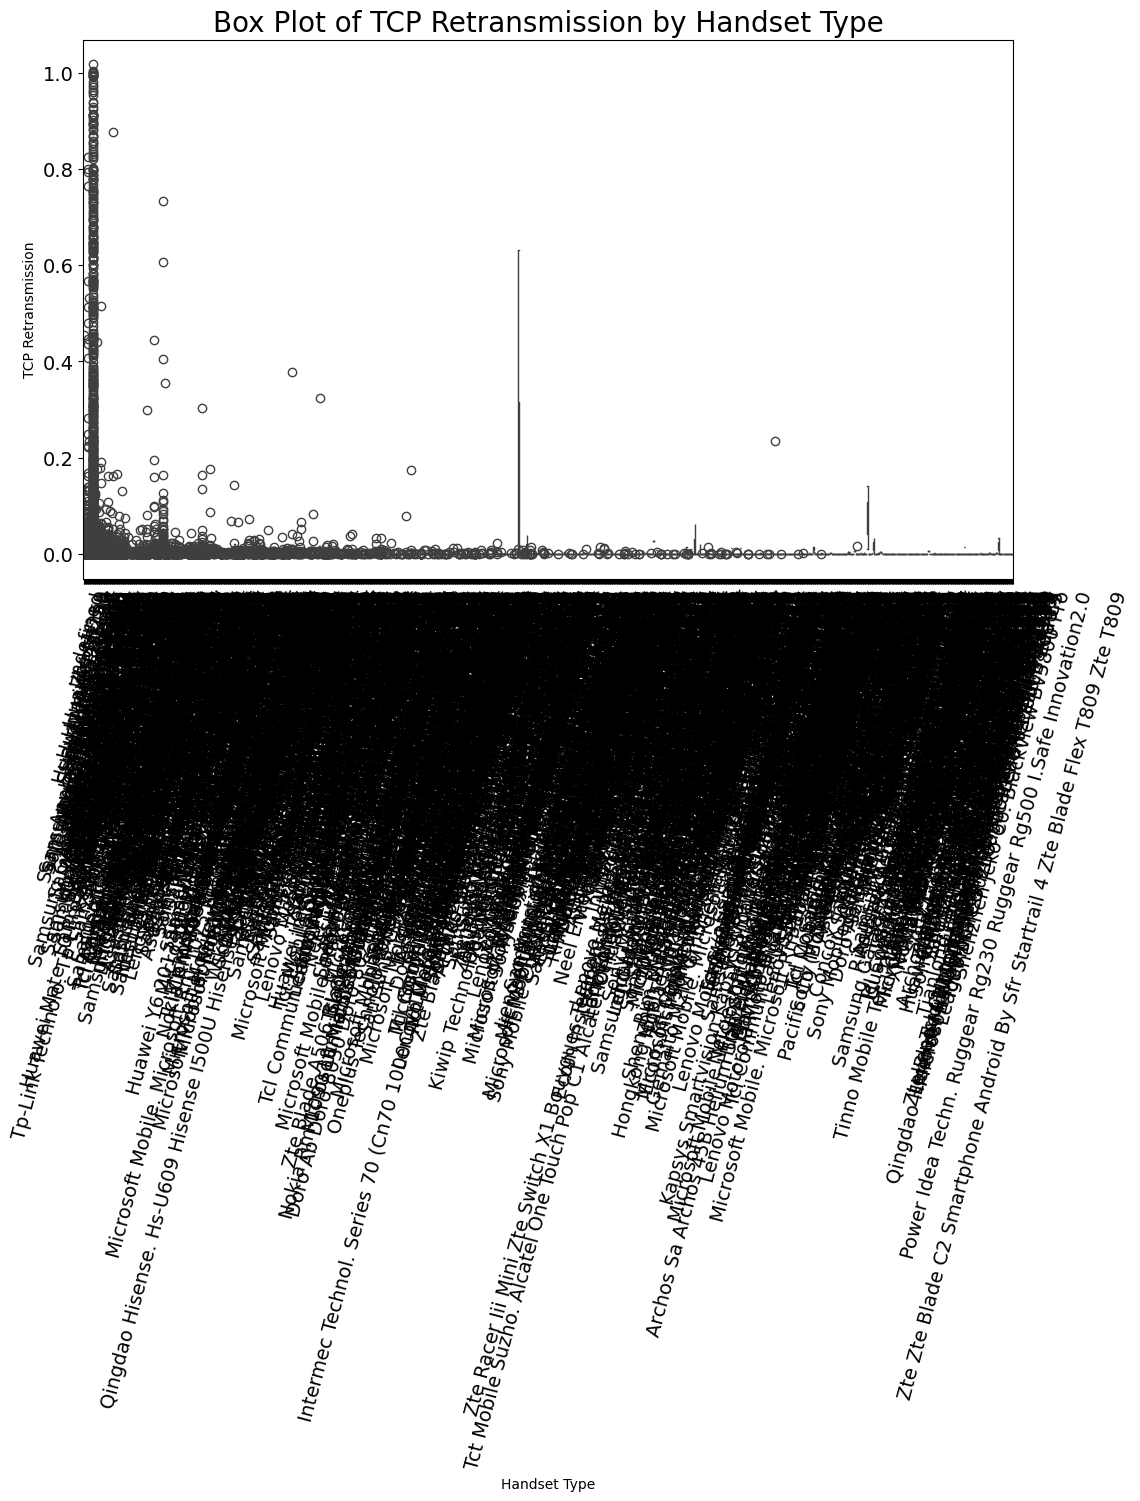

In [54]:
plot_box_multi(t3, 'Handset Type', 'TCP Retransmission', 'Box Plot of TCP Retransmission by Handset Type')


Generates and displays various plots including box plots, violin plots, and a heatmap of correlations.

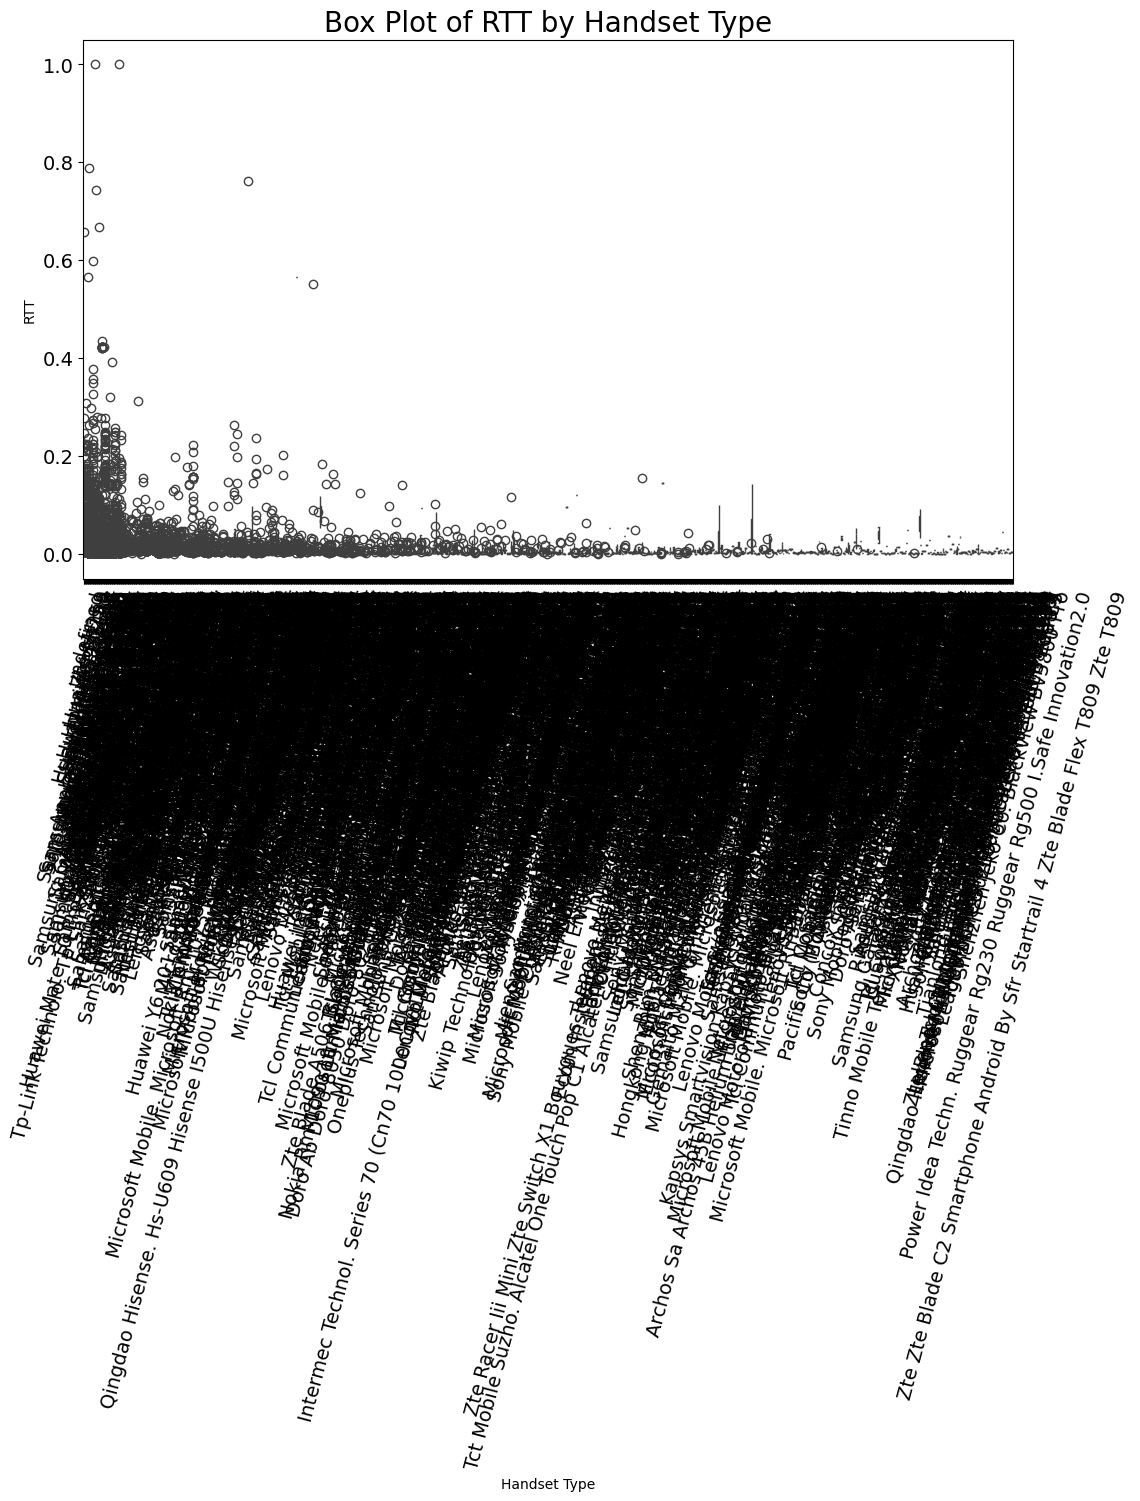

In [56]:
plot_box_multi(t3, 'Handset Type', 'RTT', 'Box Plot of RTT by Handset Type')


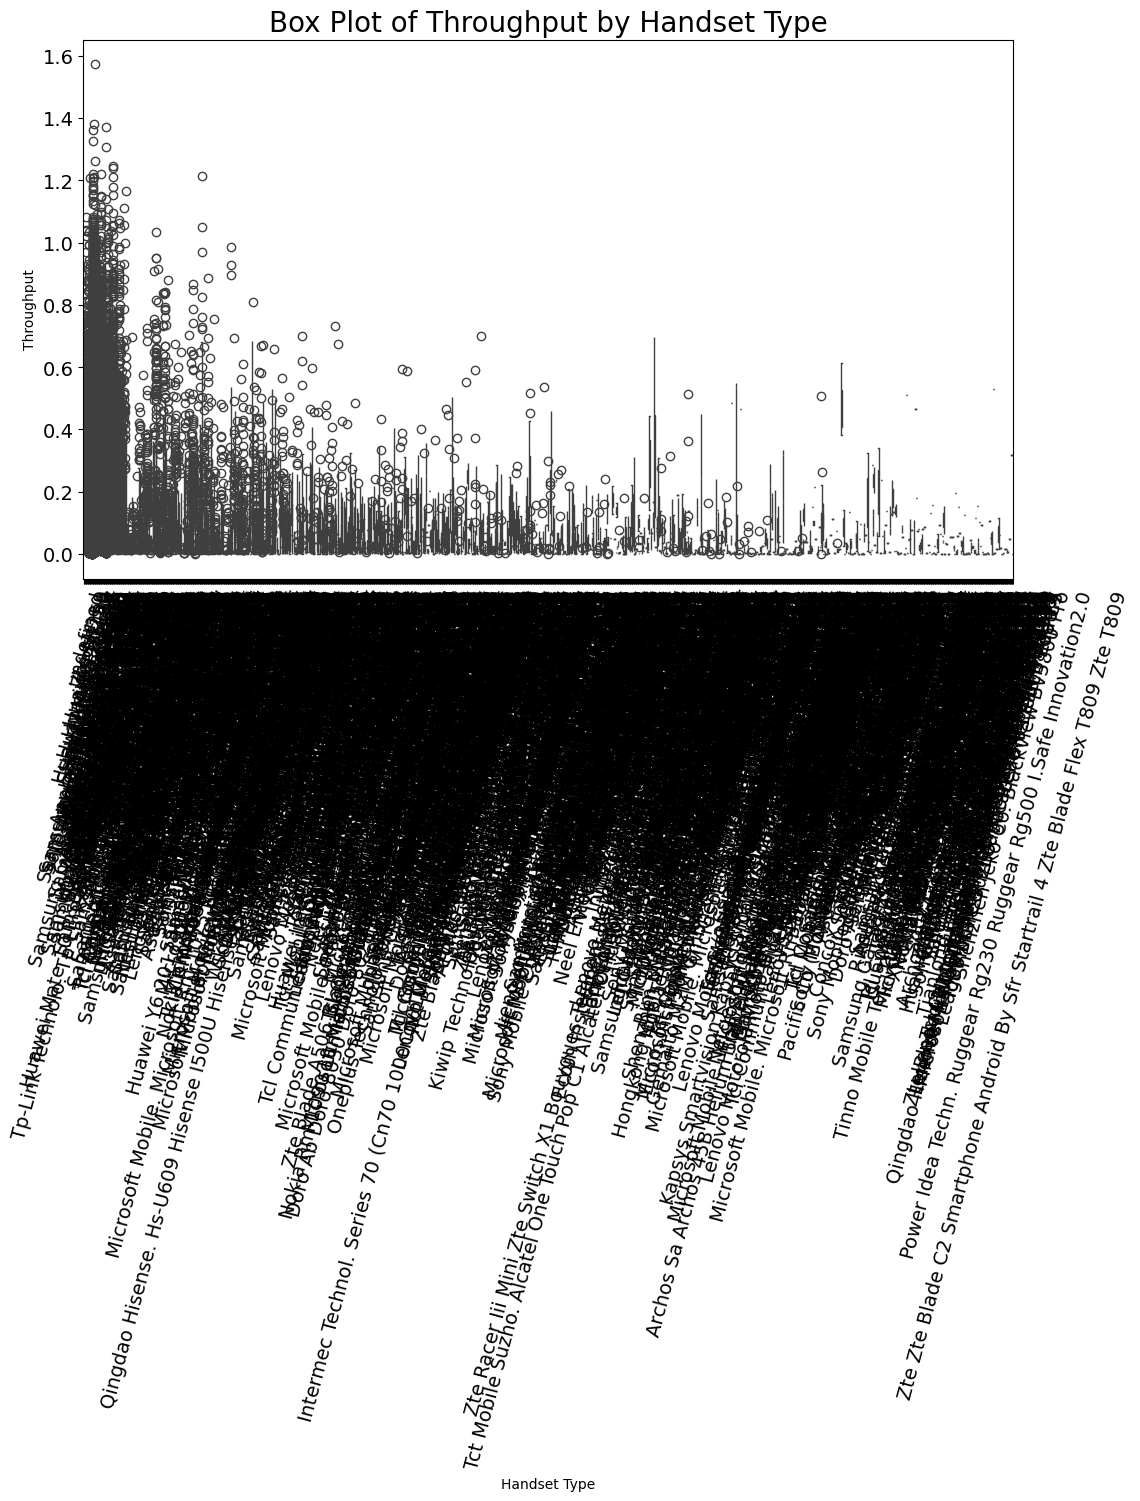

In [57]:
plot_box_multi(t3, 'Handset Type', 'Throughput', 'Box Plot of Throughput by Handset Type')

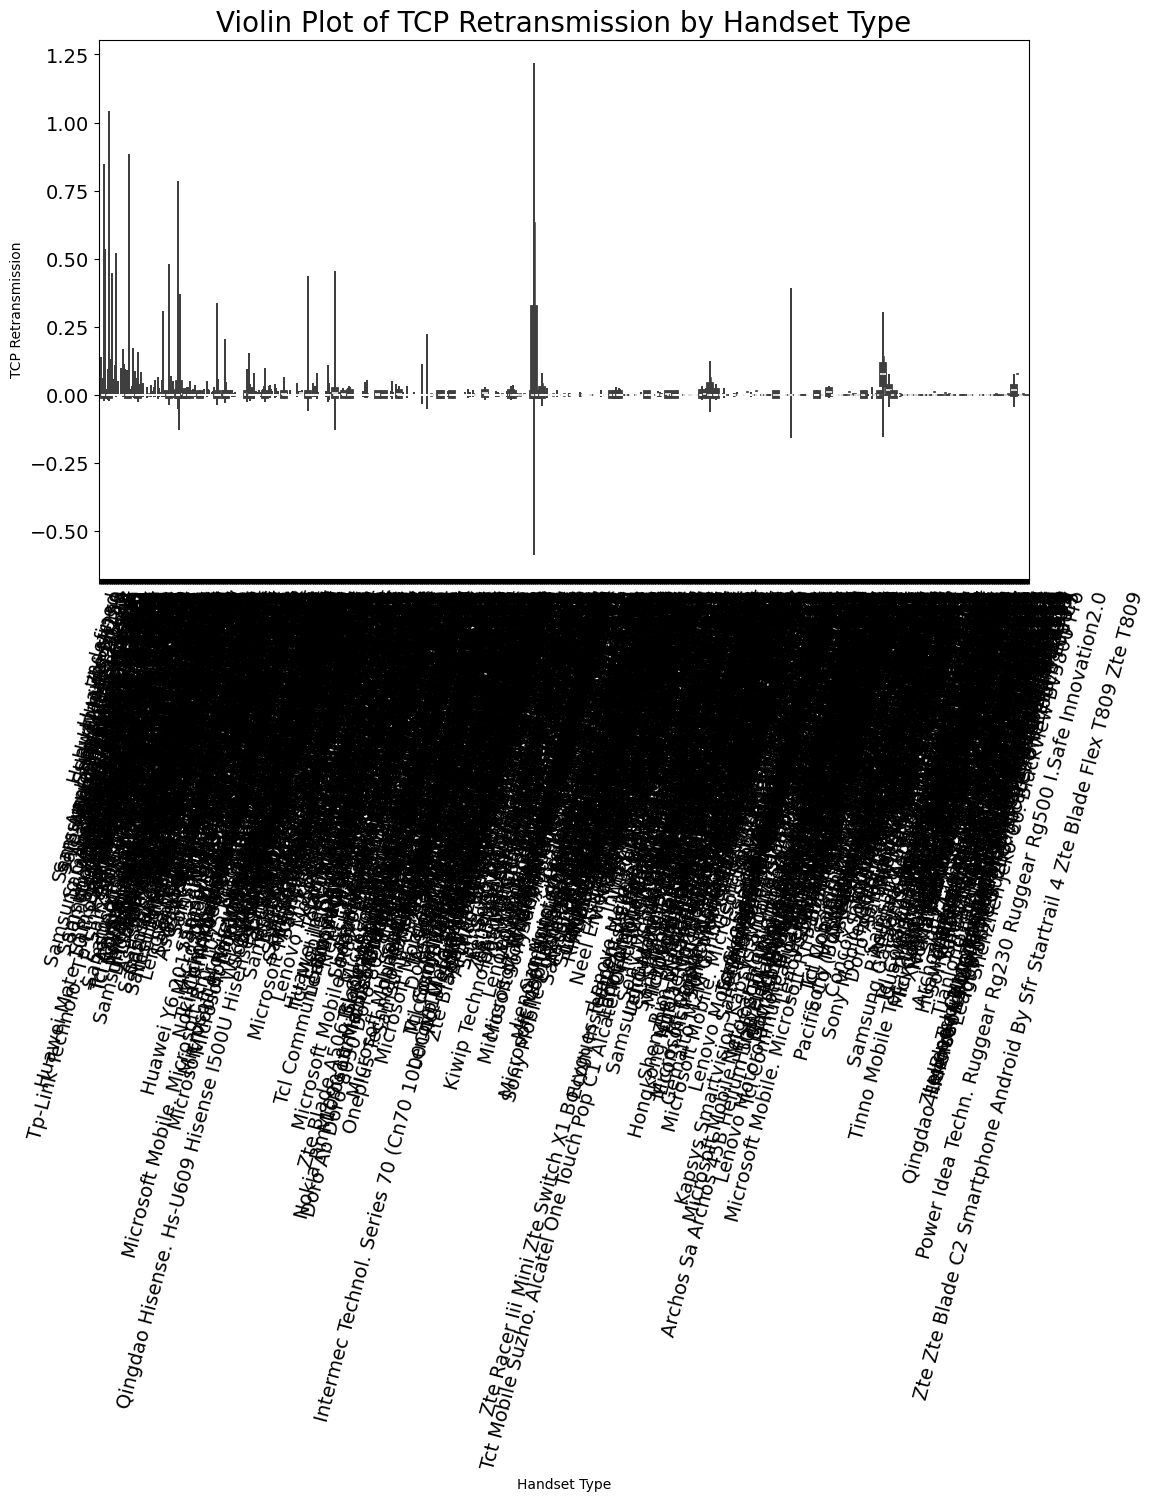

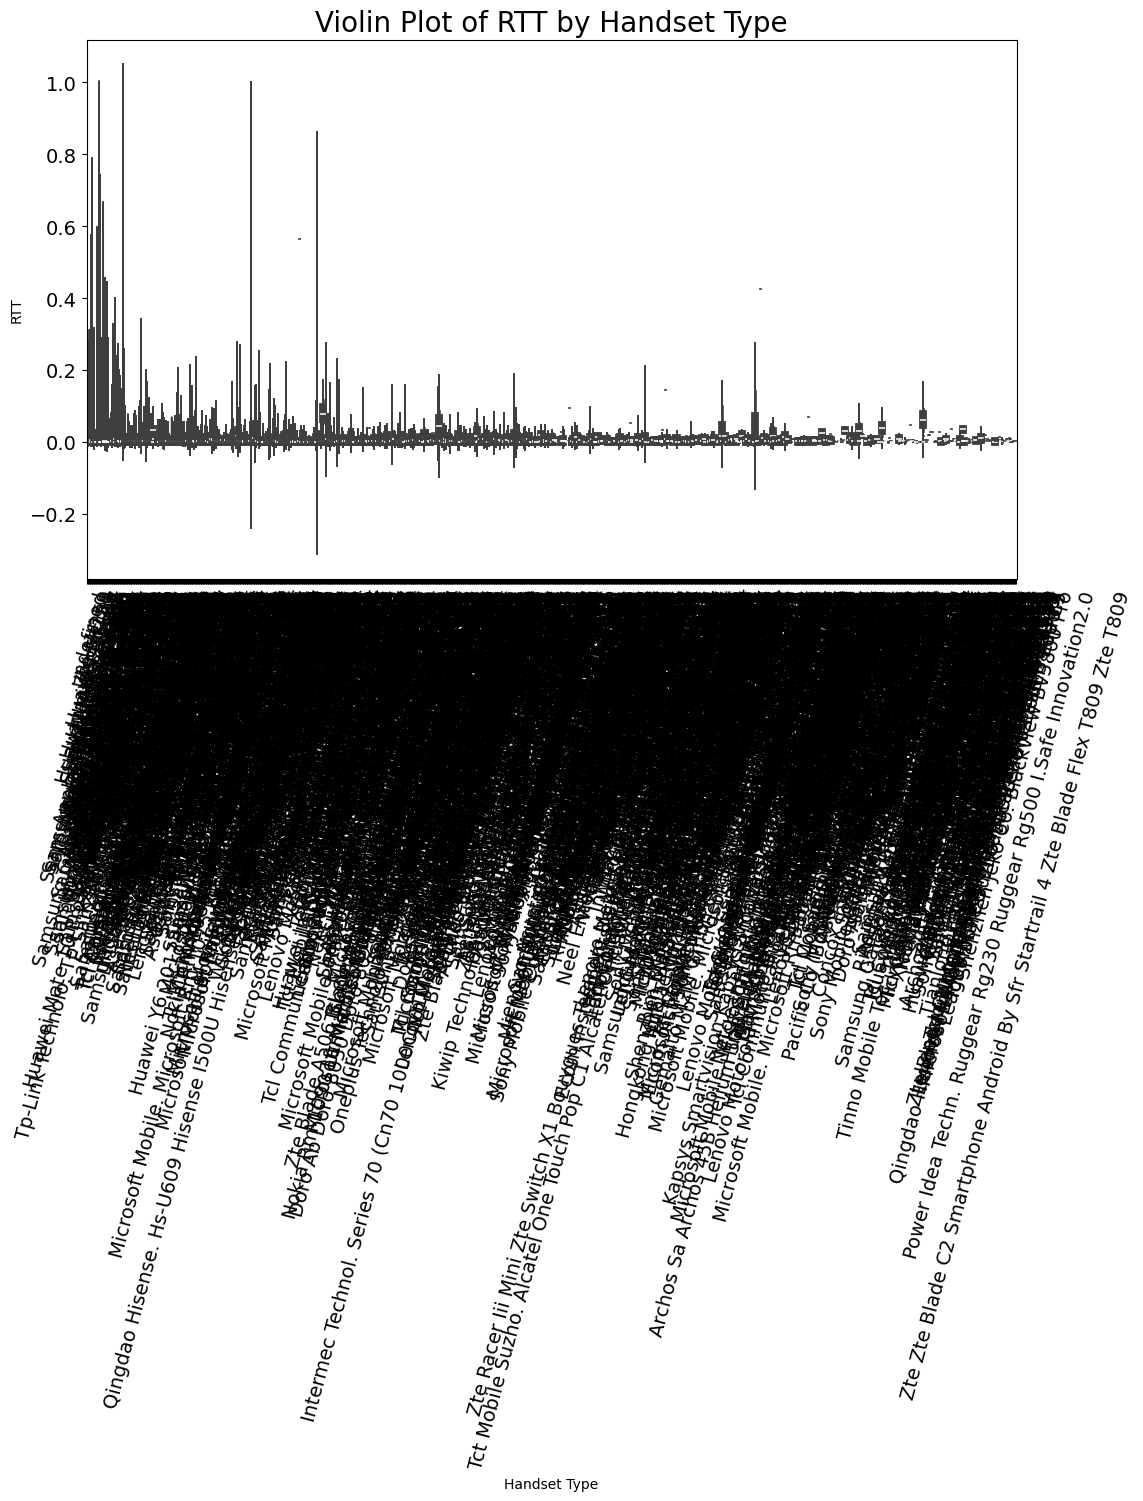

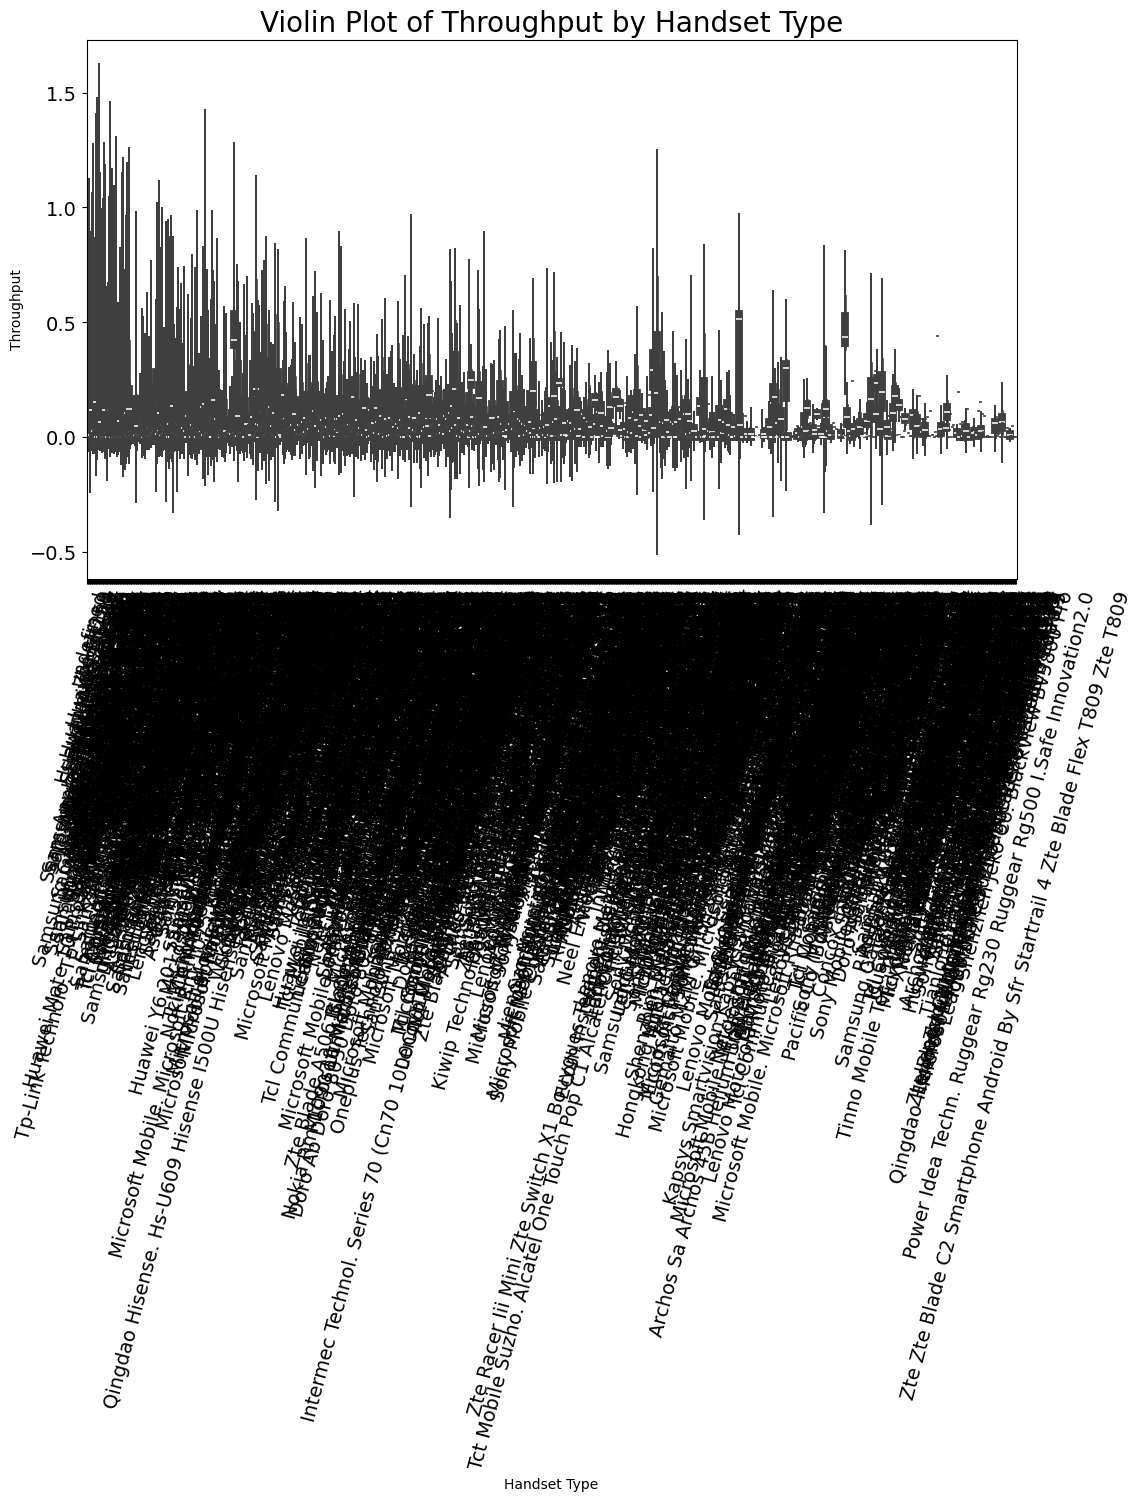

In [58]:
plot_violin(t3, 'Handset Type', 'TCP Retransmission', 'Violin Plot of TCP Retransmission by Handset Type')
plot_violin(t3, 'Handset Type', 'RTT', 'Violin Plot of RTT by Handset Type')
plot_violin(t3, 'Handset Type', 'Throughput', 'Violin Plot of Throughput by Handset Type')

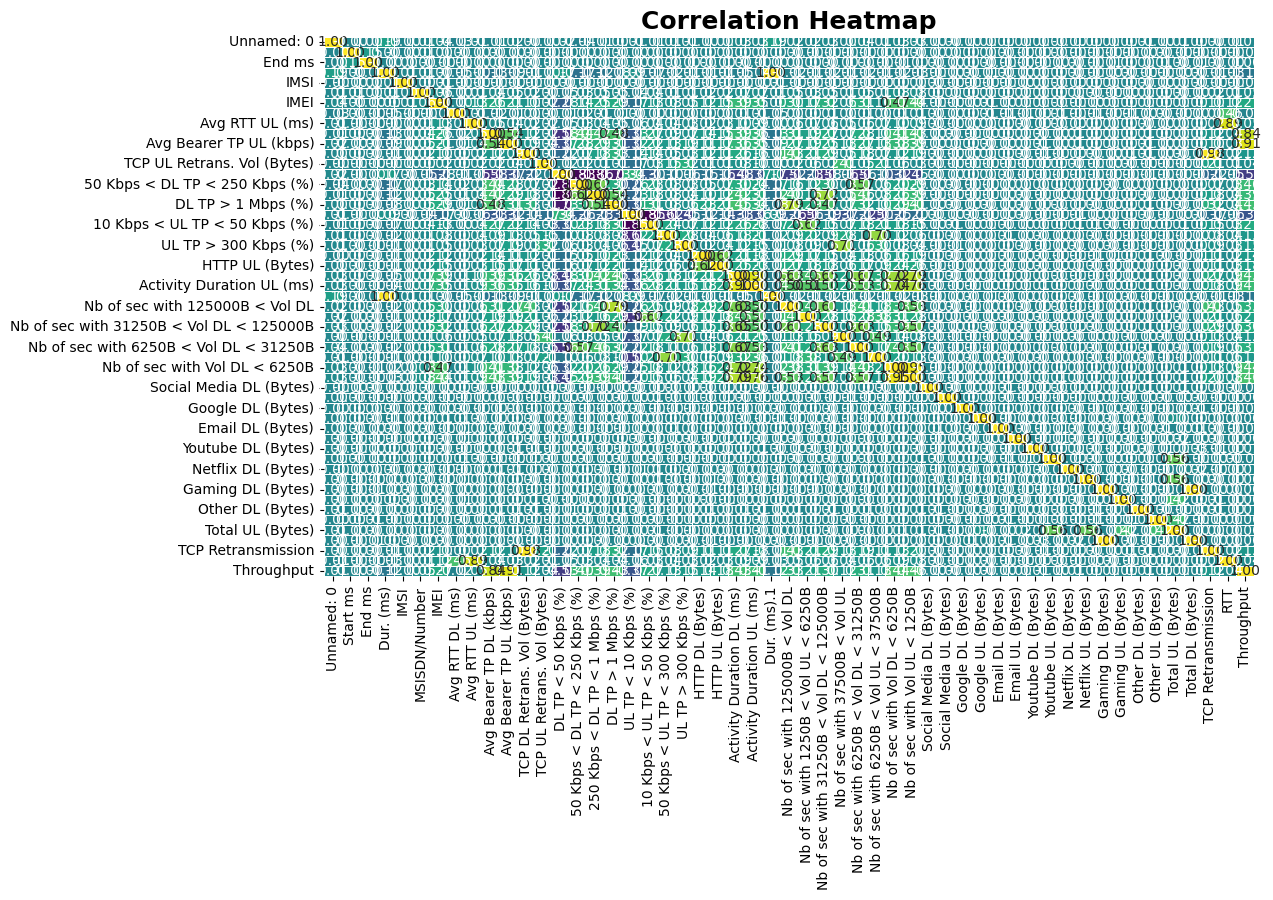

In [59]:
plot_heatmap(t3, 'Correlation Heatmap')

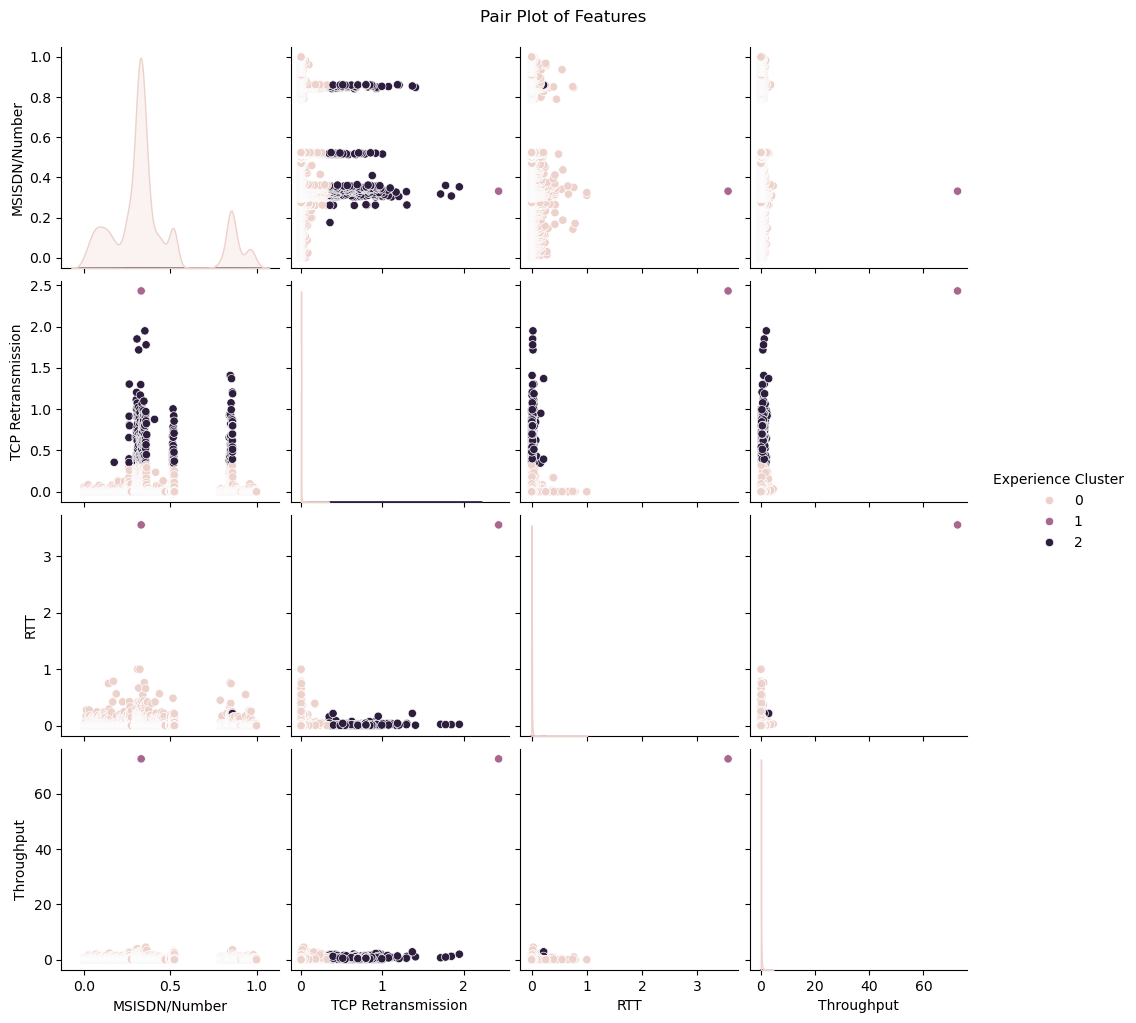

In [60]:
def plot_pairplot(t3: pd.DataFrame, hue: str) -> None:
    if hue not in t3.columns:
        raise ValueError(f"Hue column '{hue}' does not exist in the DataFrame.")
    
    sns.pairplot(t3, hue=hue)
    plt.suptitle('Pair Plot of Features', y=1.02)
    plt.show()
    
plot_pairplot(customer_agg, 'Experience Cluster')

In [61]:
cluster_analysis['Experience Cluster'].value_counts()


Experience Cluster
0.00    1
1.00    1
2.00    1
Name: count, dtype: int64